[link](https://umap-learn.readthedocs.io/en/latest/parameters.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
%matplotlib inline

c:\Users\franc\anaconda3\envs\mytorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import umap.umap_ as umap

In [3]:
sns.set(style='dark', context='poster', rc={'figure.figsize':(14,10)})

In [12]:
np.random.seed(42)
data = np.random.rand(8000, 4)

In [5]:
data[:4]

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848],
       [0.15601864, 0.15599452, 0.05808361, 0.86617615],
       [0.60111501, 0.70807258, 0.02058449, 0.96990985],
       [0.83244264, 0.21233911, 0.18182497, 0.18340451]])

In [13]:
fit = umap.UMAP()
%time u = fit.fit_transform(data)

CPU times: total: 21.6 s
Wall time: 34.9 s


In [7]:
u.shape

(8000, 2)

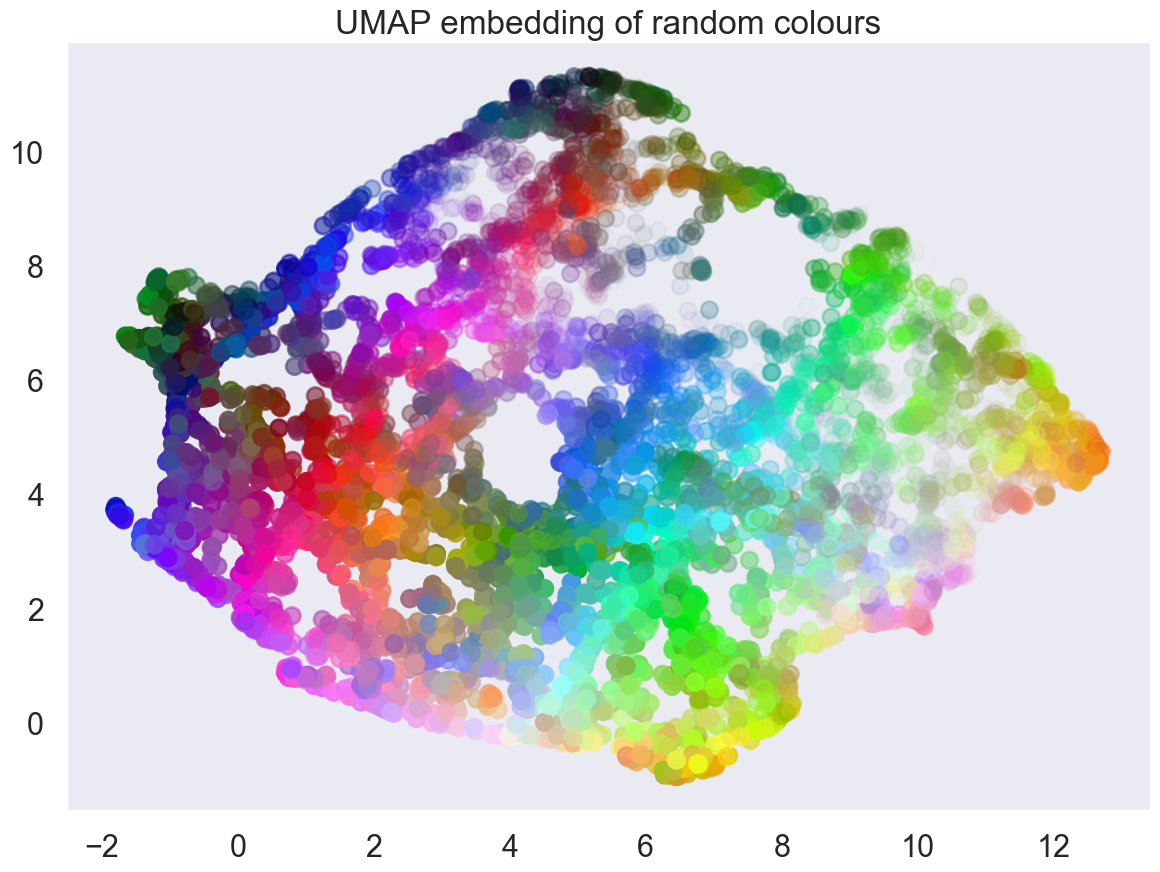

In [8]:
plt.scatter(u[:,0], u[:,1], c=data)
plt.title('UMAP embedding of random colours');

## Hyperparameters

n_neighbors

min_dist

n_components

metric


In [11]:
sns.set(style='dark', context='poster', rc={'figure.figsize':(7,5)})

In [10]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=data)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=data)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data, s=100)
    plt.title(title, fontsize=18)

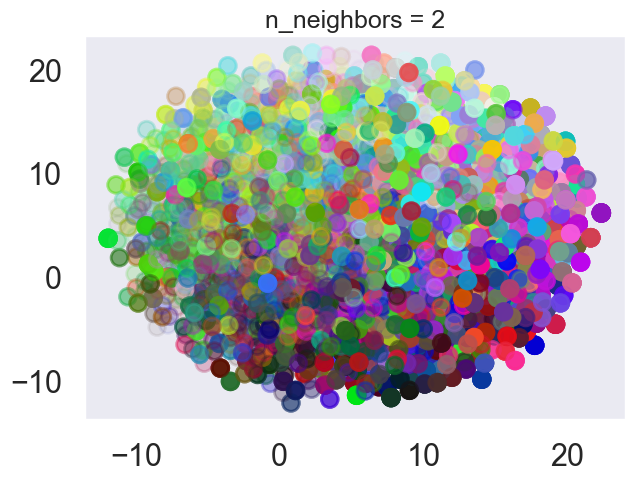

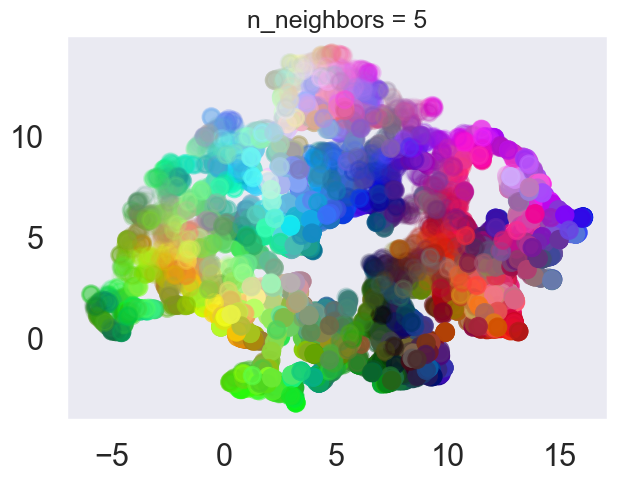

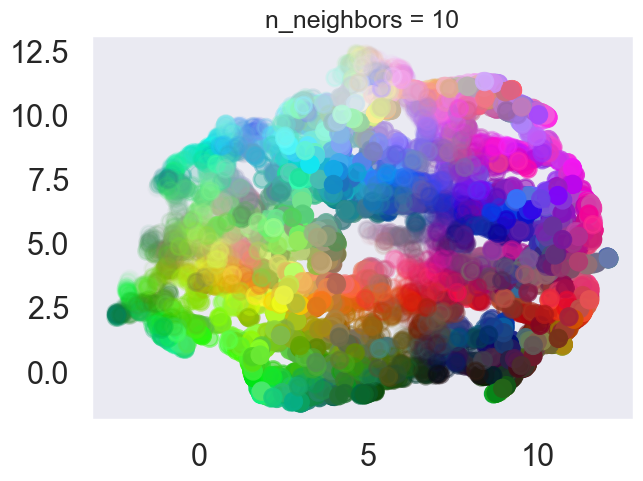

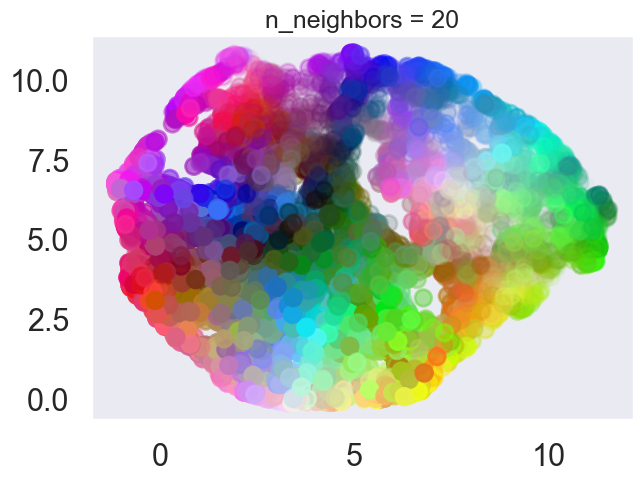

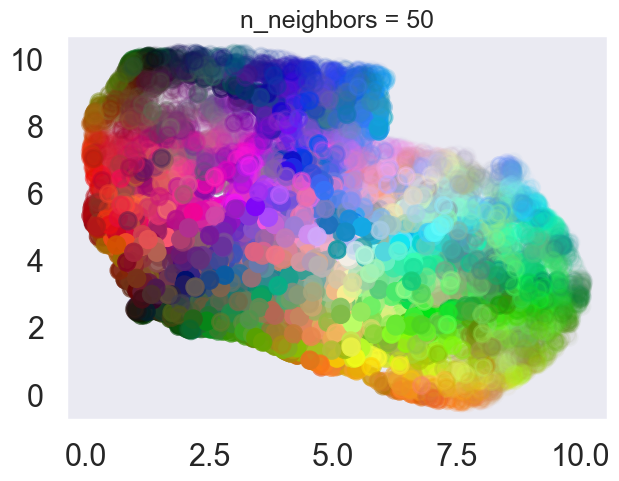

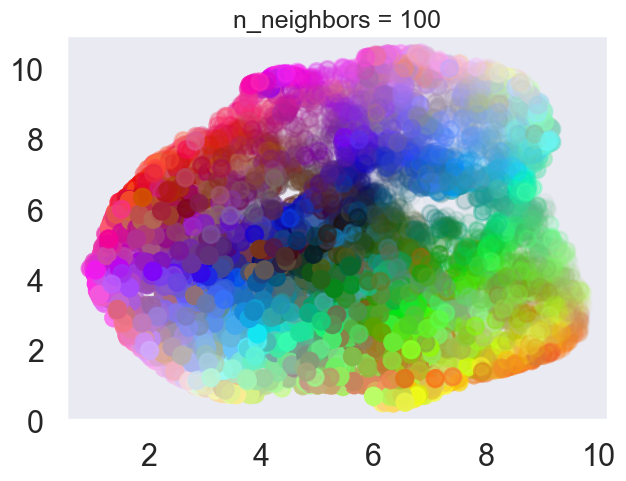

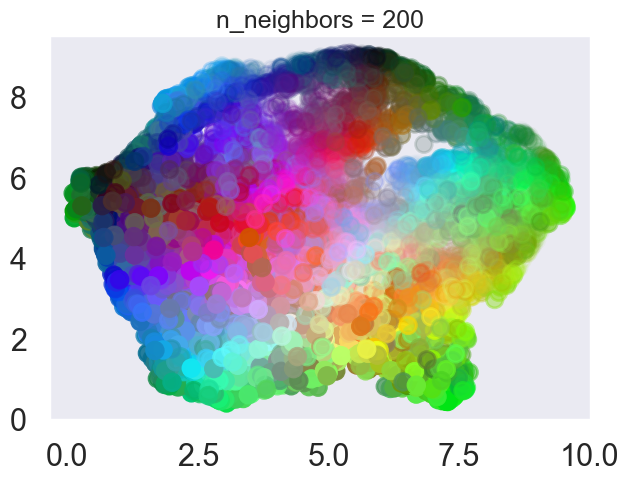

In [12]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

In [14]:
sns.set(style='dark', context='poster', rc={'figure.figsize':(14,10)})

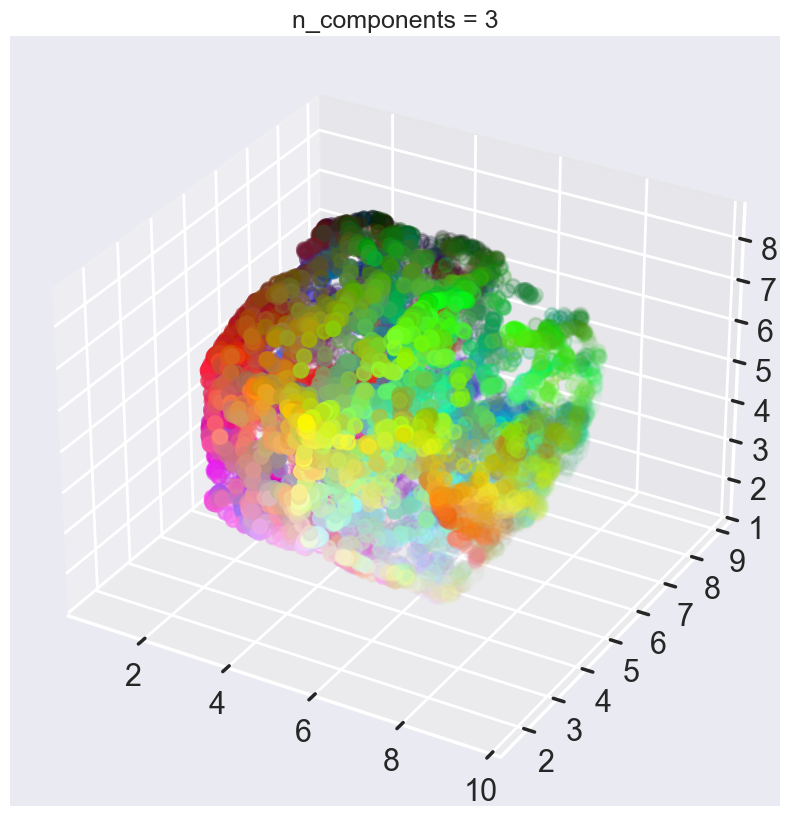

In [15]:
draw_umap(n_components=3, title='n_components = 3')

# Hyperparameters / Metric 

Minkowski style metrics

- euclidean
- manhattan
- chebyshev
- minkowski

Miscellaneous spatial metrics

- canberra
- braycurtis
- haversine

Normalized spatial metrics

- mahalanobis
- wminkowski
- seuclidean

Angular and correlation metrics

- cosine
- correlation

Metrics for binary data

- hamming
- jaccard
- dice
- russellrao
- kulsinski
- rogerstanimoto
- sokalmichener
- sokalsneath
- yule

In [3]:
import numba

For this custom metric we’ll define the distance to be the absolute value of difference in the red channel.

In [5]:
@numba.njit()
def red_channel_dist(a,b):
    return np.abs(a[0] - b[0])

@numba.njit() indique à Numba de compiler la fonction en "Just-In-Time" (JIT)

In [6]:
@numba.njit()
def hue(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    delta = cmax - cmin
    if cmax == r:
        return ((g - b) / delta) % 6
    elif cmax == g:
        return ((b - r) / delta) + 2
    else:
        return ((r - g) / delta) + 4

@numba.njit()
def lightness(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    return (cmax + cmin) / 2.0

@numba.njit()
def saturation(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    chroma = cmax - cmin
    light = lightness(r, g, b)
    if light == 1:
        return 0
    else:
        return chroma / (1 - abs(2*light - 1))

In [7]:
@numba.njit()
def hue_dist(a, b):
    diff = (hue(a[0], a[1], a[2]) - hue(b[0], b[1], b[2])) % 6
    if diff < 0:
        return diff + 6
    else:
        return diff

@numba.njit()
def sl_dist(a, b):
    a_sat = saturation(a[0], a[1], a[2])
    b_sat = saturation(b[0], b[1], b[2])
    a_light = lightness(a[0], a[1], a[2])
    b_light = lightness(b[0], b[1], b[2])
    return (a_sat - b_sat)**2 + (a_light - b_light)**2

@numba.njit()
def hsl_dist(a, b):
    a_sat = saturation(a[0], a[1], a[2])
    b_sat = saturation(b[0], b[1], b[2])
    a_light = lightness(a[0], a[1], a[2])
    b_light = lightness(b[0], b[1], b[2])
    a_hue = hue(a[0], a[1], a[2])
    b_hue = hue(b[0], b[1], b[2])
    return (a_sat - b_sat)**2 + (a_light - b_light)**2 + (((a_hue - b_hue) % 6) / 6.0)

Si m est une fonction (pas de type str), alors m.__name__ est utilisé pour récupérer le nom de la fonction.

c:\Users\franc\anaconda3\envs\mytorch\Lib\site-packages\umap\umap_.py:1857: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
c:\Users\franc\anaconda3\envs\mytorch\Lib\site-packages\umap\umap_.py:1857: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
c:\Users\franc\anaconda3\envs\mytorch\Lib\site-packages\umap\umap_.py:1857: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
c:\Users\franc\anaconda3\envs\mytorch\Lib\site

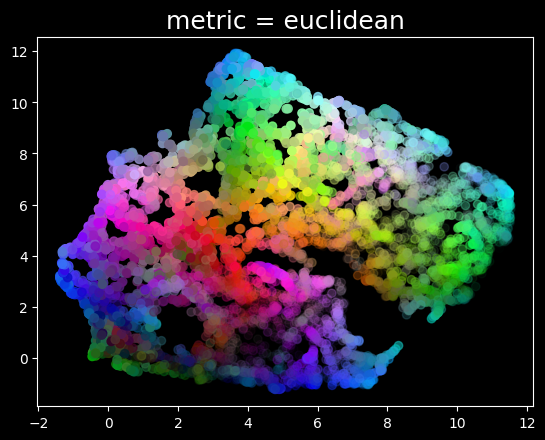

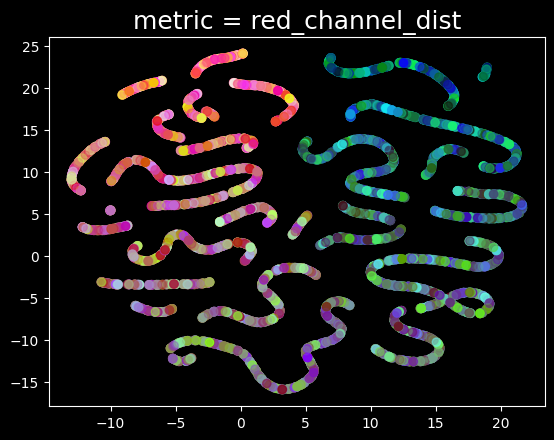

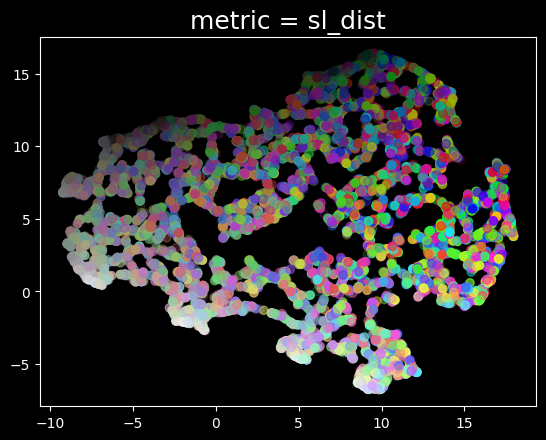

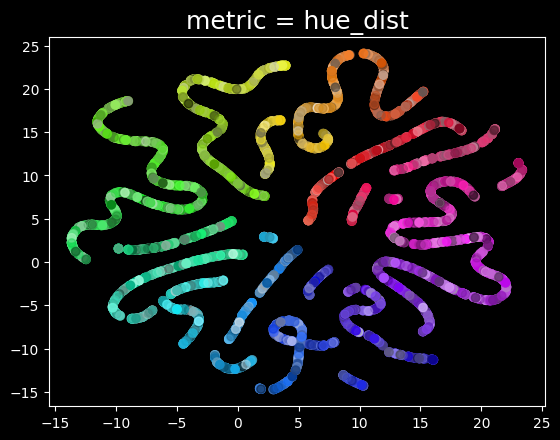

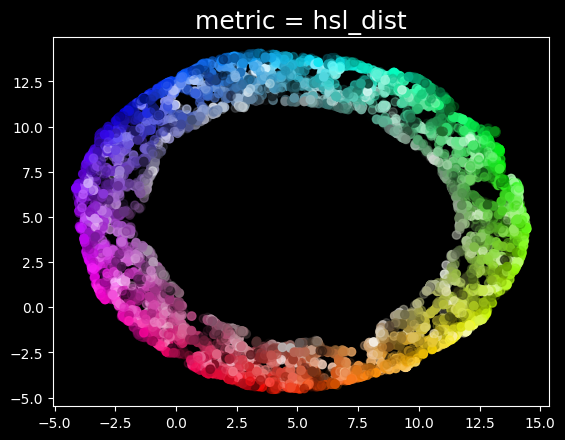

In [14]:
for m in ("euclidean", red_channel_dist, sl_dist, hue_dist, hsl_dist):
    name = m if type(m) is str else m.__name__
    draw_umap(n_components=2, metric=m, title='metric = {}'.format(name))